<a href="https://colab.research.google.com/github/THEKINGRR21/Amethyst-Troika/blob/main/finaltraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import cv2
from tensorflow.keras.optimizers import Adamax

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserhessein/shoulder-implant-xray")

print("Path to dataset files:", path)

100%|██████████| 5.99M/5.99M [00:00<00:00, 63.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yasserhessein/shoulder-implant-xray/versions/1


In [6]:
train_df="/content/train.zip"
test_df="/content/dataset_final.zip"

In [ ]:
img_height, img_width = 128, 128  # Reduced image size
batch_size = 16

In [10]:
import os as os
import pandas as pd
import zipfile

# Assuming 'train_df' is the path to the zip file
train_df = "/content/train.zip"

# Extract the zip file to a temporary directory
with zipfile.ZipFile(train_df, 'r') as zip_ref:
    zip_ref.extractall("temp_train")  # Extract to 'temp_train' directory

filepaths = []
labels = []

# Now, list the contents of the extracted directory
folds = os.listdir("temp_train")

for fold in folds:
    foldpath = os.path.join("temp_train", fold)

    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)

        filepaths.append(fpath)
        labels.append(fold)

train_df = pd.DataFrame(data={'filepaths': filepaths, 'labels': labels})
# Optionally, remove the temporary directory after processing
# import shutil
# shutil.rmtree("temp_train")

train_df

,filepaths,labels
0,temp_train/train/83_implant_cropped_jpg.rf.0f9...,train
1,temp_train/train/35_png_jpg.rf.d9c86cbb4f57879...,train
2,temp_train/train/222_implant_cropped_jpg.rf.f4...,train
3,temp_train/train/45-2-_jpg.rf.a42a123509fc01f8...,train
4,temp_train/train/85_implant_cropped_jpg.rf.cec...,train
...,...,...
135,temp_train/train/166_implant_cropped_jpg.rf.ed...,train
136,temp_train/train/10_jpg.rf.b17894795df4e97931e...,train
137,temp_train/train/234_implant_cropped_jpg.rf.19...,train
138,temp_train/train/155_implant_cropped_jpg.rf.3b...,train


In [13]:
import zipfile
import os as os
import pandas as pd

# Assuming 'test_df' is the path to the zip file
test_df_zip_path = "/content/dataset_final.zip"  # Store the zip path

# Extract the zip file to a temporary directory
with zipfile.ZipFile(test_df_zip_path, 'r') as zip_ref:
    zip_ref.extractall("temp_test")  # Extract to 'temp_test' directory

filepaths = []
labels = []

# Now, list the contents of the extracted directory
folds = os.listdir("temp_test")  # List contents of extracted directory

for fold in folds:
    foldpath = os.path.join("temp_test", fold)  # Use the temporary directory

    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)

        filepaths.append(fpath)
        labels.append(fold)

test_df = pd.DataFrame(data={'filepaths': filepaths, 'labels': labels})
# Optionally, remove the temporary directory after processing
# import shutil
# shutil.rmtree("temp_test")
test_df

,filepaths,labels
0,temp_test/test/0050_jpg.rf.e7733defe872346ac04...,test
1,temp_test/test/0015_jpg.rf.987eb917e24531ac0f2...,test
2,temp_test/test/0088_jpg.rf.06c2054371e54646cb6...,test
3,temp_test/test/0064_jpg.rf.5bb1f4438486b73a8ff...,test
4,temp_test/test/0079_jpg.rf.2e0aa16e0179527dba4...,test
5,temp_test/test/0084_jpg.rf.19fc44153218b6bb464...,test
6,temp_test/test/0064_jpg.rf.fa2316f675d09e9b1e4...,test
7,temp_test/test/0040_jpg.rf.4870dd4e8dcc28b3d74...,test
8,temp_test/test/0020_jpg.rf.52c54c4db99fe68130a...,test
9,temp_test/test/0029_jpg.rf.b0bc88b7e7fd869fc93...,test


In [ ]:
valid_df , test_df = train_test_split(test_df,test_size = 0.5,
                                      random_state=42)


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile
import os
import pandas as pd

# --- Dataset Preparation ---

# Assuming 'train_df' is the path to the zip file
train_df_zip_path = "/content/train.zip"

# Extract the zip file to a temporary directory
with zipfile.ZipFile(train_df_zip_path, 'r') as zip_ref:
    zip_ref.extractall("temp_train")

filepaths = []
labels = []

# List the contents of the extracted directory
folds = os.listdir("temp_train")

for fold in folds:
    foldpath = os.path.join("temp_train", fold)

    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)

        filepaths.append(fpath)
        labels.append(fold)

train_df = pd.DataFrame(data={'filepaths': filepaths, 'labels': labels})


# Assuming 'test_df' is the path to the zip file
test_df_zip_path = "/content/dataset_final.zip"

# Extract the zip file to a temporary directory
with zipfile.ZipFile(test_df_zip_path, 'r') as zip_ref:
    zip_ref.extractall("temp_test")

filepaths = []
labels = []

# List the contents of the extracted directory
folds = os.listdir("temp_test")

for fold in folds:
    foldpath = os.path.join("temp_test", fold)

    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)

        filepaths.append(fpath)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile
import os
import pandas as pd

# --- Dataset Preparation ---

# Assuming 'train_df' is the path to the zip file
train_df_zip_path = "/content/train.zip"

# Extract the zip file to a temporary directory
with zipfile.ZipFile(train_df_zip_path, 'r') as zip_ref:
    zip_ref.extractall("temp_train")

filepaths = []
labels = []

# List the contents of the extracted directory
folds = os.listdir("temp_train")

for fold in folds:
    foldpath = os.path.join("temp_train", fold)

    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)

        filepaths.append(fpath)
        labels.append(fold)

train_df = pd.DataFrame(data={'filepaths': filepaths, 'labels': labels})


# Assuming 'test_df' is the path to the zip file
test_df_zip_path = "/content/dataset_final.zip"

# Extract the zip file to a temporary directory
with zipfile.ZipFile(test_df_zip_path, 'r') as zip_ref:
    zip_ref.extractall("temp_test")

filepaths = []
labels = []

# List the contents of the extracted directory
folds = os.listdir("temp_test")

for fold in folds:
    foldpath = os.path.join("temp_test", fold)

    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)

        filepaths.append(fpath)
        labels.append(fold)

test_df = pd.DataFrame(data={'filepaths': filepaths, 'labels': labels})

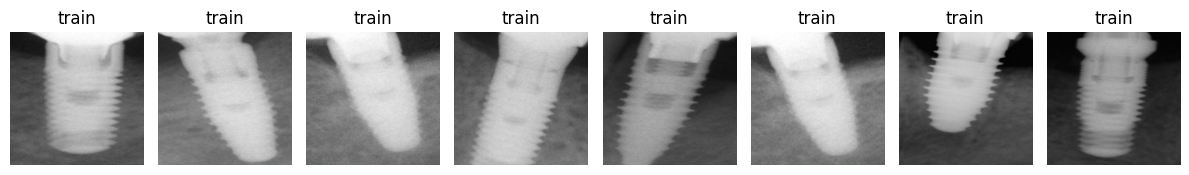

In [23]:
import matplotlib.pyplot as plt
import cv2
def display_sample_images(dataframe, n=8):
    plt.figure(figsize=(12, 12))

    sample_df = dataframe.sample(n=n).reset_index(drop=True)

    for i in range(n):
        filepath = sample_df.loc[i, 'filepaths']
        label = sample_df.loc[i, 'labels']

        image = cv2.imread(filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display

        plt.subplot(1, n, i+1)
        plt.imshow(image)
        plt.title(label, fontsize=12)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Removed the extra indented block that was causing the error
# display_sample_images(train_df, n=8)  # This line was likely intended to be here

display_sample_images(train_df, n=8) # call the function to display images

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import cv2
from tensorflow.keras.optimizers import Adamax
import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile

# Download the dataset (if not already downloaded)
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
print("Path to dataset files:", path)

# Define paths to training and testing data
train_df_zip_path = "/content/train.zip"  # Path to the training zip file
test_df_zip_path = "/content/dataset_final.zip"  # Path to the testing zip file

# --- Load training data ---
# Extract training data to a temporary directory
with zipfile.ZipFile(train_df_zip_path, 'r') as zip_ref:
    zip_ref.extractall("temp_train")
train_df_path = "temp_train"  # Path to the extracted training data

filepaths = []
labels = []
folds = os.listdir(train_df_path)  # List folders in the extracted directory
for fold in folds:
    foldpath = os.path.join(train_df_path, fold)
    files = os.listdir(foldpath)  # List files in each folder
    for f in files:
        fpath = os.path.join(foldpath, f)
        filepaths.append(fpath)
        labels.append(fold)
train_df = pd.DataFrame(data={'filepaths': filepaths, 'labels': labels})


# --- Load testing data ---
# Extract testing data to a temporary directory
with zipfile.ZipFile(test_df_zip_path, 'r') as zip_ref:
    zip_ref.extractall("temp_test")
test_df_path = "temp_test"  # Path to the extracted testing data

filepaths = []
labels = []
folds = os.listdir(test_df_path)  # List folders in the extracted directory
for fold in folds:
    foldpath = os.path.join(test_df_path, fold)
    files = os.listdir(foldpath)  # List files in each folder
    for f in files:
        fpath = os.path.join(foldpath, f)
        filepaths.append(fpath)
        labels.append(fold)
test_df = pd.DataFrame(data={'filepaths': filepaths, 'labels': labels})

# --- Rest of your code ---
# ... (No changes needed in the rest of the code)

Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


In [30]:
train_gen = gen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical', # Ensures one-hot encoding for labels
    batch_size=32,
    # Add this to shuffle the training data
    shuffle=True
)

test_gen = gen.flow_from_dataframe(
    test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical', # Ensures one-hot encoding for labels
    batch_size=32,
    shuffle=False # Keep test data in the original order
)

valid_gen = gen.flow_from_dataframe(
    valid_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical', # Ensures one-hot encoding for labels
    batch_size=32,
    shuffle=False # Keep validation data in the original order
)

Found 140 validated image filenames belonging to 1 classes.
Found 25 validated image filenames belonging to 1 classes.
Found 25 validated image filenames belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


In [33]:
!pip install tensorflow
import tensorflow as tf

# Inside the data generator, before passing target labels:
from tensorflow.keras.utils import to_categorical

train_gen = gen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical', # Ensures one-hot encoding for labels
    batch_size=32,
    # Add this to shuffle the training data
    shuffle=True,
    # preprocessor= lambda x: to_categorical(x)  # apply to_categorical to labels
)
test_gen = gen.flow_from_dataframe(
    test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical', # Ensures one-hot encoding for labels
    batch_size=32,
    shuffle=False # Keep test data in the original order,
    # preprocessor= lambda x: to_categorical(x) # apply to_categorical to labels
)
valid_gen = gen.flow_from_dataframe(
    valid_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical', # Ensures one-hot encoding for labels
    batch_size=32,
    shuffle=False # Keep validation data in the original order,
    # preprocessor= lambda x: to_categorical(x) # apply to_categorical to labels
)

Found 140 validated image filenames belonging to 1 classes.
Found 25 validated image filenames belonging to 1 classes.
Found 25 validated image filenames belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


In [36]:
from google.colab import files
model.save('final.h5')

In [37]:
files.download('final.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>